## Import library

In [2]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.feature_extraction.text import CountVectorizer

# Import packages for data modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

## Load Data

In [3]:
# Load dataset into dataframe
data = pd.read_csv("C:/Users/user/OneDrive/Documents/UM/Y3S1/DSP/tiktok_dataset.csv")

## Data analysis

In [4]:
# Display first few rows
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


### Dimension of data

In [5]:
# Get number of rows and column
data.shape

(19382, 12)

In [6]:
# Get basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [7]:
# Generate basic descriptive stats
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [8]:
# Check for missing values
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [9]:
# Check class balance
data["claim_status"].value_counts(normalize=True)

claim_status
claim      0.503458
opinion    0.496542
Name: proportion, dtype: float64

### Visualize relationships between features in the dataset (heatmap)

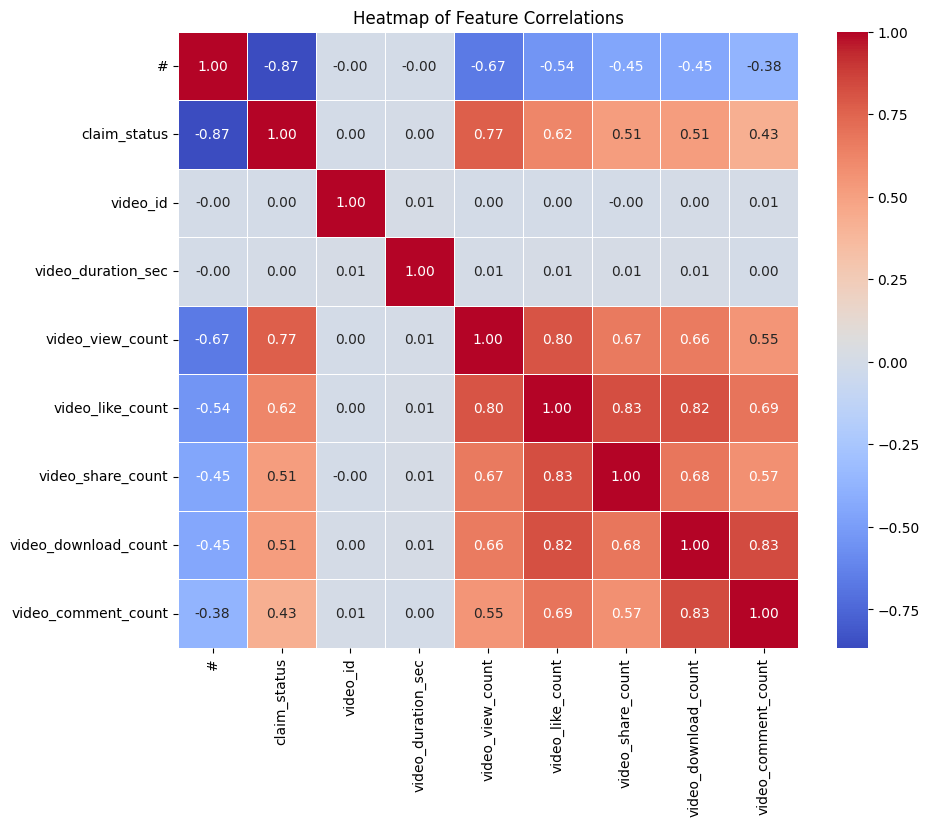

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Assuming your data is in a pandas DataFrame named `df`
# Replace `df` with the name of your actual DataFrame

# Select numerical columns (exclude non-numerical data)
data['claim_status'] = data['claim_status'].replace({'opinion': 0, 'claim': 1})
numerical_df = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Set figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and labels
plt.title('Heatmap of Feature Correlations')
plt.show()


### Filter columns and encode data

In [11]:
# Check for duplicates
data.duplicated().sum()

0

In [12]:
# Drop rows with missing values
data = data.dropna(axis=0)

In [13]:
X = data.copy()
# Drop unnecessary columns
X = X.drop(['#', 'video_id', 'verified_status',	'author_ban_status', 'video_duration_sec'], axis=1)
X.head()

,claim_status,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1.0,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0
1,1.0,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0
2,1.0,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0
3,1.0,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0
4,1.0,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0


In [14]:
print("Dimension of dataset (after cleaning): ", X.shape)

Dimension of dataset (after cleaning):  (19084, 7)


### Split the data

In [72]:
# Isolate target variable
y = X['claim_status']

# Verify the output data is assigned to y
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: claim_status, dtype: float64

In [73]:
# Isolate y values in the dataset
X = X.drop(['claim_status'], axis=1)

# Display first few rows of features dataframe
X.head()

,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0
1,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0
2,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0
3,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0
4,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0


### Split data into training, testing and validating datasets

In [74]:
# Split the data into training and testing sets
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state=0)

# Get shape of each training, validation, and testing set
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

X_train.columns

Index(['video_transcription_text', 'video_view_count', 'video_like_count',
       'video_share_count', 'video_download_count', 'video_comment_count'],
      dtype='object')

In [75]:
# Filter out video text column for transformer definition

non_text_features = ['video_view_count', 
                     'video_like_count', 
                     'video_share_count', 
                     'video_download_count', 
                     'video_comment_count',]

## Random forest classifier

In [76]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Instantiate the random forest classifier
random_forest = RandomForestClassifier(random_state=42)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [5, 7, None],
             'max_features': [0.3, 0.6],
            #  'max_features': 'auto'
             'max_samples': [0.7],
             'min_samples_leaf': [1,2],
             'min_samples_split': [2,3],
             'n_estimators': [75,100,200],
             } 

# Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate the GridSearchCV object
random_forest_cv = GridSearchCV(random_forest, cv_params, scoring=scoring, cv=5, refit='recall')

# Set up a `CountVectorizer` object, which converts a collection of text to a matrix of token counts
count_vec = CountVectorizer(ngram_range=(2, 3),
                            max_features=15,
                            stop_words='english')

# 2. For 'video_transcription_text', we'll tokenize it using CountVectorizer
column_transformer = ColumnTransformer(
    transformers=[
        ('num_features', SimpleImputer(strategy='mean'), non_text_features),  # Handle missing values for numerical features
        ('text', count_vec, 'video_transcription_text')  # Tokenize the text
    ])

pipeline = Pipeline([
    ('preprocessor', column_transformer),  # Apply the transformations
    ('classifier', random_forest_cv)  
])

pipeline.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_features',
                                                  SimpleImputer(),
                                                  ['video_view_count',
                                                   'video_like_count',
                                                   'video_share_count',
                                                   'video_download_count',
                                                   'video_comment_count']),
                                                 ('text',
                                                  CountVectorizer(max_features=15,
                                                                  ngram_range=(2,
                                                                               3),
                                                                  stop_words='english'),
                                                  'video_transcription_text')])),
                ('classifier',
                 GridSearchCV(cv=5,
                              estimator=RandomForestClassifier(random_state=42),
                              param_grid={'max_depth': [5, 7, None],
                                          'max_features': [0.3, 0.6],
                                          'max_samples': [0.7],
                                          'min_samples_leaf': [1, 2],
                                          'min_samples_split': [2, 3],
                                          'n_estimators': [75, 100, 200]},
                              refit='recall',
                              scoring={'accuracy', 'f1', 'precision',
                                       'recall'}))])

In [78]:
import joblib 

joblib.dump(pipeline, "pipeline1.pkl")

['pipeline1.pkl']

### Manually restructure and tokenize validation and test data

#### Validation data

In [79]:
# Extract the fitted CountVectorizer from the pipeline
fitted_count_vec = pipeline.named_steps['preprocessor'].transformers_[1][1]

# Use it to transform the validation set
validation_count_data = fitted_count_vec.transform(X_val['video_transcription_text']).toarray()

# Proceed with creating the DataFrame as before
validation_count_df = pd.DataFrame(data=validation_count_data, columns=fitted_count_vec.get_feature_names_out())
X_val_final = pd.concat([X_val.drop(columns=['video_transcription_text']).reset_index(drop=True), validation_count_df], axis=1)

# Display first few rows
X_val_final.head()

,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,colleague discovered,colleague learned,colleague read,discovered news,discussion board,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,578891.0,379596.0,14612.0,6591.0,44.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,6255.0,1709.0,311.0,13.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,410356.0,249714.0,26235.0,2060.0,1252.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,406911.0,25986.0,1230.0,564.0,248.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,972573.0,138167.0,25320.0,3331.0,968.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


#### Test data

In [89]:
# Extract the fitted CountVectorizer from the pipeline
fitted_count_vec = pipeline.named_steps['preprocessor'].transformers_[1][1]

# Use it to transform the test set
test_count_data = fitted_count_vec.transform(X_test['video_transcription_text']).toarray()

# Place the numerical representation of `video_transcription_text` into a dataframe
test_count_df = pd.DataFrame(data=test_count_data, columns=fitted_count_vec.get_feature_names_out())

# Concatenate `X_test` and `test_count_df` to form the final dataframe for test data (`X_test_final`)
X_test_final = pd.concat([X_test.drop(columns=['video_transcription_text']).reset_index(drop=True), test_count_df], axis=1)

# Display first few rows
X_test_final.head()

,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,colleague discovered,colleague learned,colleague read,discovered news,discussion board,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,692084.0,135956.0,16591.0,622.0,312.0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,5164.0,1858.0,36.0,17.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,801951.0,344163.0,57608.0,8578.0,2942.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6429.0,2314.0,847.0,17.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,555780.0,106863.0,15348.0,252.0,91.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Best score and best parameter

In [90]:
best_params = pipeline.named_steps['classifier'].best_params_
best_score = pipeline.named_steps['classifier'].best_score_
print("Best Parameters:", best_params)
print("Best Score (Recall):", best_score)  # Since 'refit' is set to 'recall'

Best Parameters: {'max_depth': None, 'max_features': 0.6, 'max_samples': 0.7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score (Recall): 0.9949956859361517


In [82]:
import joblib

joblib.dump(pipeline, 'misinformation_pipeline-v2.pkl')

['misinformation_pipeline-v2.pkl']

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate the logistic regression classifier
logistic_regression = LogisticRegression(random_state=42, max_iter=1000)

# Create a dictionary of hyperparameters to tune
cv_params = {
    'C': [0.1, 1, 10],  # Regularization strength
    'solver': ['lbfgs', 'liblinear'],  # Optimization algorithms
    'penalty': ['l2'],  # Regularization types (L1 not supported by all solvers)
    'class_weight': [None, 'balanced']  # Handle imbalanced datasets
}

# Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate the GridSearchCV object
logistic_regression_cv = GridSearchCV(
    logistic_regression, 
    cv_params, 
    scoring=scoring, 
    cv=5, 
    refit='recall'
)

# Set up a `CountVectorizer` object for text tokenization
count_vec = CountVectorizer(
    ngram_range=(2, 3),
    max_features=15,
    stop_words='english'
)

# Define the ColumnTransformer
column_transformer = ColumnTransformer(
    transformers=[
        ('num_features', SimpleImputer(strategy='mean'), non_text_features),  # Handle missing values
        ('text', count_vec, 'video_transcription_text')  # Tokenize text
    ]
)

# Define the pipeline
pipeline2 = Pipeline([
    ('preprocessor', column_transformer),  # Apply transformations
    ('classifier', logistic_regression_cv)  # Logistic regression with hyperparameter tuning
])

# Fit the pipeline
pipeline2.fit(X_train, y_train)


In [ ]:
import joblib 

joblib.dump(pipeline2, "pipeline2.pkl")

### Manually restructure and tokenize validation and test data

#### Validation data

In [ ]:
# Extract the fitted CountVectorizer from the pipeline
fitted_count_vec = pipeline2.named_steps['preprocessor'].transformers_[1][1]

# Use it to transform the validation set
validation_count_data = fitted_count_vec.transform(X_val['video_transcription_text']).toarray()

# Proceed with creating the DataFrame as before
validation_count_df = pd.DataFrame(data=validation_count_data, columns=fitted_count_vec.get_feature_names_out())
X_val_final = pd.concat([X_val.drop(columns=['video_transcription_text']).reset_index(drop=True), validation_count_df], axis=1)

# Display first few rows
X_val_final.head()

#### Test data

In [ ]:
# Extract the fitted CountVectorizer from the pipeline
fitted_count_vec = pipeline2.named_steps['preprocessor'].transformers_[1][1]

# Use it to transform the test set
test_count_data = fitted_count_vec.transform(X_test['video_transcription_text']).toarray()

# Place the numerical representation of `video_transcription_text` into a dataframe
test_count_df = pd.DataFrame(data=test_count_data, columns=fitted_count_vec.get_feature_names_out())

# Concatenate `X_test` and `test_count_df` to form the final dataframe for test data (`X_test_final`)
X_test_final = pd.concat([X_test.drop(columns=['video_transcription_text']).reset_index(drop=True), test_count_df], axis=1)

# Display first few rows
X_test_final.head()

### Best score and best parameter

In [ ]:
best_params = pipeline2.named_steps['classifier'].best_params_
best_score = pipeline2.named_steps['classifier'].best_score_
print("Best Parameters:", best_params)
print("Best Score (Recall):", best_score)  # Since 'refit' is set to 'recall'

In [ ]:
import joblib

joblib.dump(pipeline2, 'misinformation_pipeline-v3.pkl')

## XGB classifier

### Transform video_transcription_text using CountVectorizer

In [52]:
# Transform `video_transcription_text` into numeric features
train_count_data = fitted_count_vec.transform(X_train['video_transcription_text']).toarray()

# Create a DataFrame with the transformed features
train_count_df = pd.DataFrame(data=train_count_data, columns=fitted_count_vec.get_feature_names_out())

# Combine the numeric features with the rest of `X_train`
X_train_final = pd.concat([X_train.drop(columns=['video_transcription_text']).reset_index(drop=True), train_count_df], axis=1)

### Transform Validation and Test Data

In [53]:
# For validation data
val_count_data = fitted_count_vec.transform(X_val['video_transcription_text']).toarray()
val_count_df = pd.DataFrame(data=val_count_data, columns=fitted_count_vec.get_feature_names_out())
X_val_final = pd.concat([X_val.drop(columns=['video_transcription_text']).reset_index(drop=True), val_count_df], axis=1)

# For test data
test_count_data = fitted_count_vec.transform(X_test['video_transcription_text']).toarray()
test_count_df = pd.DataFrame(data=test_count_data, columns=fitted_count_vec.get_feature_names_out())
X_test_final = pd.concat([X_test.drop(columns=['video_transcription_text']).reset_index(drop=True), test_count_df], axis=1)

### Fit the XGBoost classifier

In [55]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [4,8,12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300, 500]
             }

# Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='recall')

In [ ]:
%%time
xgb_cv.fit(X_train_final, y_train)

### Best score and parameter

In [ ]:
# Best score (based on the metric specified in refit, here it's 'recall')
best_score = xgb_cv.best_score_ # type: ignore
print(f"Best Score: {best_score}")

# Best hyperparameters
best_params = xgb_cv.best_params_ # type: ignore
print(f"Best Parameters: {best_params}")

## Evaluating Models

### Confusion Matrix

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


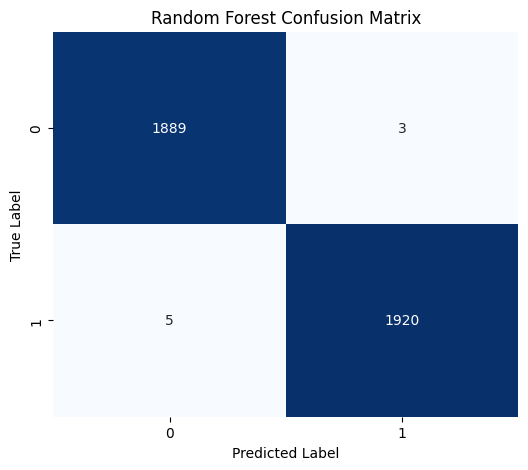

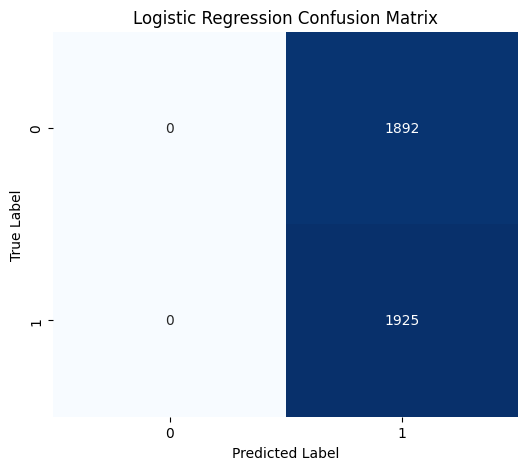

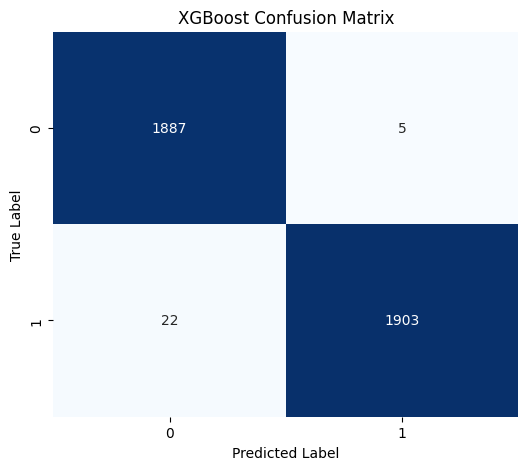

In [85]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions for Random Forest
rf_predictions = random_forest_cv.predict(X_val_final)

# Predictions for Logistic Regression
lg_predictions = logistic_regression_cv.predict(X_val_final) # type: ignore

# Predictions for XGBoost
xgb_predictions = xgb_cv.predict(X_val_final) # type: ignore

# Confusion matrices
rf_conf_matrix = confusion_matrix(y_val, rf_predictions)
lg_conf_matrix = confusion_matrix(y_val, lg_predictions)
xgb_conf_matrix = confusion_matrix(y_val, xgb_predictions)

def plot_confusion_matrix(conf_matrix, model_name):
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Plot confusion matrices for Random Forest and XGBoost
plot_confusion_matrix(rf_conf_matrix, "Random Forest")
plot_confusion_matrix(lg_conf_matrix, "Logistic Regression")
plot_confusion_matrix(xgb_conf_matrix, "XGBoost")

### Classification Report

In [86]:
# Classification reports
rf_classification_report = classification_report(y_val, rf_predictions)
lg_classification_report = classification_report(y_val, lg_predictions)
xgb_classification_report = classification_report(y_val, xgb_predictions)

print("Random Forest Classification Report:")
print(rf_classification_report)

print("Logistic Regression Classification Report:")
print(lg_classification_report)

print("\nXGBoost Classification Report:")
print(xgb_classification_report)

Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1892
         1.0       1.00      1.00      1.00      1925

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1892
         1.0       0.50      1.00      0.67      1925

    accuracy                           0.50      3817
   macro avg       0.25      0.50      0.34      3817
weighted avg       0.25      0.50      0.34      3817


XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1892
         1.0       1.00      0.99      0.99      1925

    accuracy                           0.99      3817
   macro avg    

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Performance Metrics Table

In [87]:
# Calculate metrics for Random Forest
rf_accuracy = accuracy_score(y_val, rf_predictions)
rf_precision = precision_score(y_val, rf_predictions)
rf_recall = recall_score(y_val, rf_predictions)
rf_f1 = f1_score(y_val, rf_predictions)

# Calculate metrics for Logistic Regression
lg_accuracy = accuracy_score(y_val, lg_predictions)
lg_precision = precision_score(y_val, lg_predictions)
lg_recall = recall_score(y_val, lg_predictions)
lg_f1 = f1_score(y_val, lg_predictions)

# Calculate metrics for XGBoost
xgb_accuracy = accuracy_score(y_val, xgb_predictions)
xgb_precision = precision_score(y_val, xgb_predictions)
xgb_recall = recall_score(y_val, xgb_predictions)
xgb_f1 = f1_score(y_val, xgb_predictions)

# Create a performance metrics table
import pandas as pd

metrics_table = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Random Forest": [rf_accuracy, rf_precision, rf_recall, rf_f1],
    "Logistic Regression": [rf_accuracy, rf_precision, rf_recall, rf_f1],
    "XGBoost": [xgb_accuracy, xgb_precision, xgb_recall, xgb_f1]
})

print("Performance Metrics Table:")
print(metrics_table)

Performance Metrics Table:
      Metric  Random Forest  Logistic Regression   XGBoost
0   Accuracy       0.997904             0.997904  0.992926
1  Precision       0.998440             0.998440  0.997379
2     Recall       0.997403             0.997403  0.988571
3   F1 Score       0.997921             0.997921  0.992956


## Save and export processed data

In [88]:
data.to_csv("processed_data-v2.csv", index=False)